# Assignment 2 - EE18BTECH11050 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Ques 1.

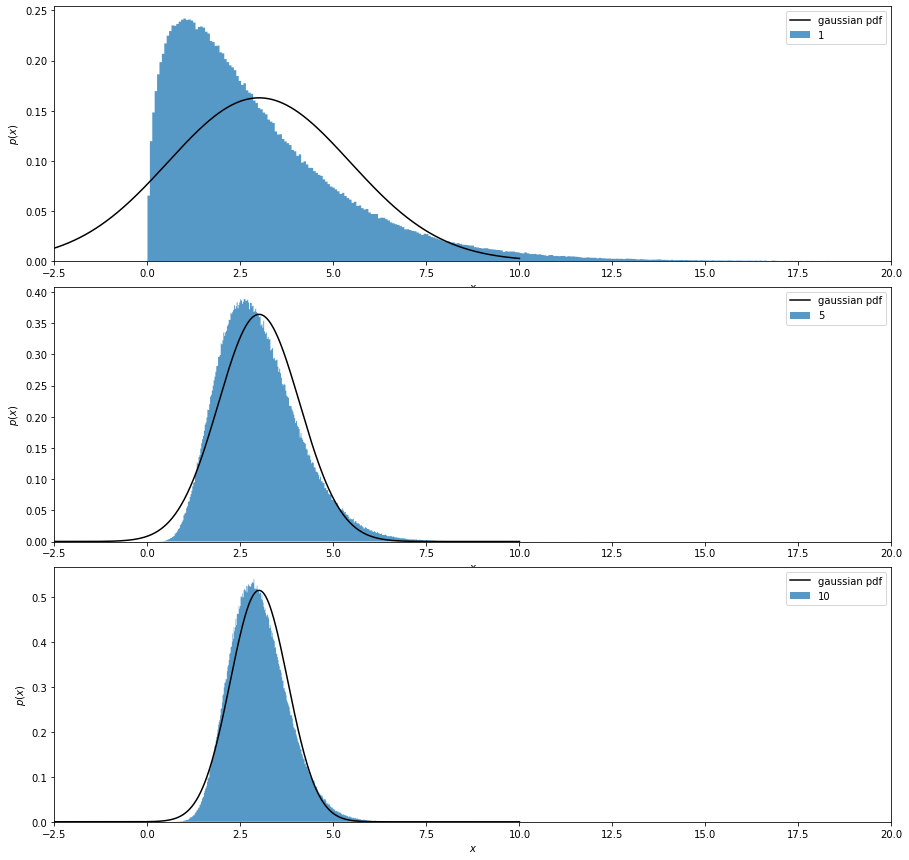

In [3]:
N = [1, 5, 10]

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.1)

for i in range(len(N)):
    #
    ax = fig.add_subplot(3, 1, i + 1)
    x = np.random.chisquare(3, (N[i], int(1E6)))

    #take the mean of the first N[i] samples
    x_i = x[:N[i], :].mean(0)

    #histogram the data
    ax.hist(x_i, bins=500, histtype='stepfilled', label=N[i], density=True, alpha=0.75)
    
    mu = 3
    sigma = np.sqrt(6/N[i])

    #gaussian pdf
    dist = stats.norm(mu, sigma)
    x_pdf = np.linspace(-10, 10, 1000)
    ax.plot(x_pdf, dist.pdf(x_pdf), color='black', label='gaussian pdf')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel('$p(x)$')
    ax.set_xlim(-2.5, 20)
    ax.legend()
plt.show()

### Ques 2.

In [4]:
data = np.loadtxt('test.dat')    #loading the data from downloaded file
print(data.shape)
Lx = data[:,0]   #luminosity
z = data[:,1]    #redshift

(46, 2)


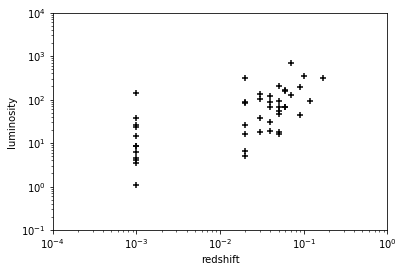

In [5]:
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.scatter(z, Lx, marker='+', color='black')
plt.xlim(10e-5, 1)
plt.ylim(10e-2, 10e3)
plt.xlabel('redshift')
plt.ylabel('luminosity')
plt.show()

By looking at the plot we can say that the datasets have positive correlation which is not strong but moderate

In [6]:
corr_coeff,p_value1 = stats.pearsonr(z, Lx)
rho,p_value2 = stats.spearmanr(z,Lx)
tau,p_value3 = stats.kendalltau(z, Lx)
print('pearson coefficient: ', corr_coeff)
print('spearman coefficient: ', rho)
print('kendall tau coefficient: ', tau)

pearson coefficient:  0.5144497852670242
spearman coefficient:  0.6596325957535454
kendall tau coefficient:  0.5029584682704178


The above values verify that the datasets have low positive correlation

In [7]:
print('p-value: ', p_value2, '-spearman', p_value3, '-kendall tau')

p-value:  6.166489759081011e-07 -spearman 2.969686227473415e-06 -kendall tau


### Ques 3. 

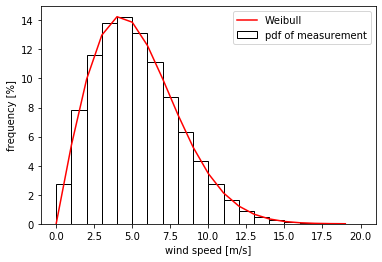

In [8]:
y = np.array([2.75, 7.80, 11.64, 13.79, 14.20, 13.15, 11.14, 8.72, 6.34,
              4.30, 2.73, 1.62, 0.91, 0.48, 0.24, 0.11, 0.05, 0.02, 0.01, 0.00])    #frequency in %
x = np.arange(0,20,1)    #class interval

k, mu, lam = 2.0, 0.0, 6.0   #parameters shown from website

dist = stats.weibull_min(k, mu, lam)   #best-fit Weibull distribution

plt.figure()
plt.plot(x, 100*dist.pdf(x), color='red', label='Weibull')
plt.bar(x, height=y, width=1, edgecolor='black', color='white', align='edge', label='pdf of measurement')
plt.legend()
plt.xlabel('wind speed [m/s]')
plt.ylabel('frequency [%]')
plt.show()

### Ques 4.

In [9]:
gaus = stats.norm(0, 1)   #Gaussian distribution of mean = 0 and standard deviation = 1

x1 = gaus.rvs(1000)   #1000 random draws from above distribution
x2 = gaus.rvs(1000)

corr_coeff,p_value = stats.pearsonr(x1, x2)    #pearson coefficient and p-value
print('pearson coefficient: ', corr_coeff)
print('p-value: ', p_value)

pearson coefficient:  0.06373790657794831
p-value:  0.043894395984913875


In [10]:
#p-value calculation from student-t distribution
t_val, p_val = stats.ttest_ind(x1, x2)
print('p-value from student-t distribution: ', p_val)

p-value from student-t distribution:  0.3238704367947921


p-value agrees with that calculated from student-t distribution